Data Import

In [8]:
import pandas as pd

df = pd.read_csv('MSFT.csv')

df

Date        Open        High         Low       Close   Adj Close  \
0     1986-03-13    0.088542    0.101563    0.088542    0.097222    0.060274   
1     1986-03-14    0.097222    0.102431    0.097222    0.100694    0.062427   
2     1986-03-17    0.100694    0.103299    0.100694    0.102431    0.063504   
3     1986-03-18    0.102431    0.103299    0.098958    0.099826    0.061889   
4     1986-03-19    0.099826    0.100694    0.097222    0.098090    0.060812   
...          ...         ...         ...         ...         ...         ...   
9525  2023-12-28  375.369995  376.459991  374.160004  375.279999  375.279999   
9526  2023-12-29  376.000000  377.160004  373.480011  376.040009  376.040009   
9527  2024-01-02  373.859985  375.899994  366.769989  370.869995  370.869995   
9528  2024-01-03  369.010010  373.260010  368.510010  370.600006  370.600006   
9529  2024-01-04  370.670013  373.100006  367.170013  367.940002  367.940002   

          Volume  
0     1031788800  
1      308160000  
2      133171200  
3       67766400  
4       47894400  
...          ...  
9525    14327000  
9526    18723000  
9527    25258600  
9528    23083500  
9529    20876900  

[9530 rows x 7 columns]

Data Selection

In [9]:
df = df[['Date', 'Close']]

df

Date       Close
0     1986-03-13    0.097222
1     1986-03-14    0.100694
2     1986-03-17    0.102431
3     1986-03-18    0.099826
4     1986-03-19    0.098090
...          ...         ...
9525  2023-12-28  375.279999
9526  2023-12-29  376.040009
9527  2024-01-02  370.869995
9528  2024-01-03  370.600006
9529  2024-01-04  367.940002

[9530 rows x 2 columns]

In [10]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9525    2023-12-28
9526    2023-12-29
9527    2024-01-02
9528    2024-01-03
9529    2024-01-04
Name: Date, Length: 9530, dtype: object

Date split

In [11]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [12]:
df

Date       Close
0     1986-03-13    0.097222
1     1986-03-14    0.100694
2     1986-03-17    0.102431
3     1986-03-18    0.099826
4     1986-03-19    0.098090
...          ...         ...
9525  2023-12-28  375.279999
9526  2023-12-29  376.040009
9527  2024-01-02  370.869995
9528  2024-01-03  370.600006
9529  2024-01-04  367.940002

[9530 rows x 2 columns]

Converting The data type of date in the orginal data to datatime data type

In [13]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-13-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9525   2023-12-28
9526   2023-12-29
9527   2024-01-02
9528   2024-01-03
9529   2024-01-04
Name: Date, Length: 9530, dtype: datetime64[ns]

Setting the date as the index

In [14]:
df.index = df.pop('Date')
df

Close
Date                  
1986-03-13    0.097222
1986-03-14    0.100694
1986-03-17    0.102431
1986-03-18    0.099826
1986-03-19    0.098090
...                ...
2023-12-28  375.279999
2023-12-29  376.040009
2024-01-02  370.869995
2024-01-03  370.600006
2024-01-04  367.940002

[9530 rows x 1 columns]

In [15]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

Converting into a supervised learning problem

In [16]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2024-01-04',
                                n=3)
windowed_df

Target Date    Target-3    Target-2    Target-1      Target
0    2021-03-25  235.990005  237.580002  235.460007  232.339996
1    2021-03-26  237.580002  235.460007  232.339996  236.479996
2    2021-03-29  235.460007  232.339996  236.479996  235.240005
3    2021-03-30  232.339996  236.479996  235.240005  231.850006
4    2021-03-31  236.479996  235.240005  231.850006  235.770004
..          ...         ...         ...         ...         ...
695  2023-12-28  374.579987  374.660004  374.070007  375.279999
696  2023-12-29  374.660004  374.070007  375.279999  376.040009
697  2024-01-02  374.070007  375.279999  376.040009  370.869995
698  2024-01-03  375.279999  376.040009  370.869995  370.600006
699  2024-01-04  376.040009  370.869995  370.600006  367.940002

[700 rows x 5 columns]

Structuring data

In [17]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((700,), (700, 3, 1), (700,))

Spliting the data into train, validation and split

In [26]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

Train Model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
18/18 [==============================] - 4s 52ms/step - loss: 77934.3516 - mean_absolute_error: 277.5099 - val_loss: 110109.2422 - val_mean_absolute_error: 331.6949
Epoch 2/100
18/18 [==============================] - 0s 7ms/step - loss: 77276.5391 - mean_absolute_error: 276.3202 - val_loss: 108958.0703 - val_mean_absolute_error: 329.9550
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 75875.2344 - mean_absolute_error: 273.7656 - val_loss: 106459.3125 - val_mean_absolute_error: 326.1465
Epoch 4/100
18/18 [==============================] - 0s 8ms/step - loss: 73188.7969 - mean_absolute_error: 268.8172 - val_loss: 102331.4453 - val_mean_absolute_error: 319.7557
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 68862.8281 - mean_absolute_error: 260.6308 - val_loss: 95575.4062 - val_mean_absolute_error: 309.0107
Epoch 6/100
18/18 [==============================] - 0s 6ms/step - loss: 62266.0352 - mean_absolute_error: 247.6129 - va

In [20]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

18/18 [==============================] - 1s 3ms/step


In [21]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 [==============================] - 0s 5ms/step


3/3 [==============================] - 0s 5ms/step


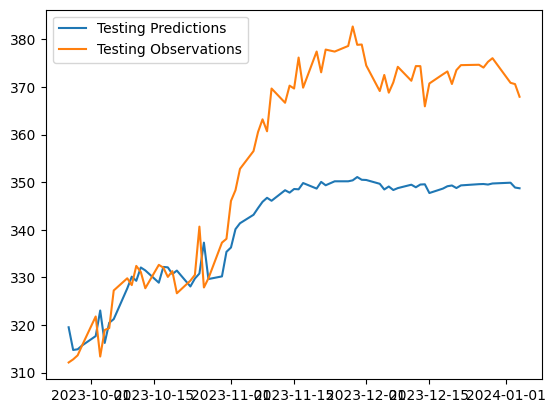

In [22]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

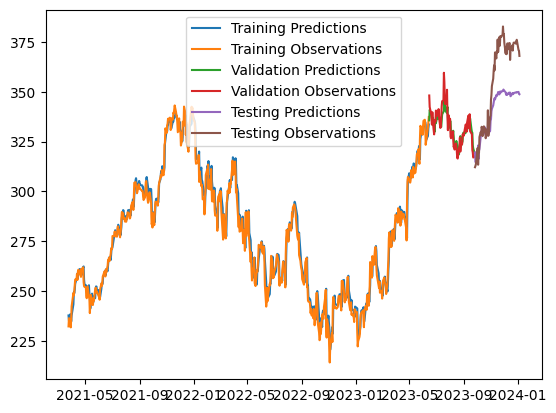

In [23]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

Recursive Predictions

In [24]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 21ms/step


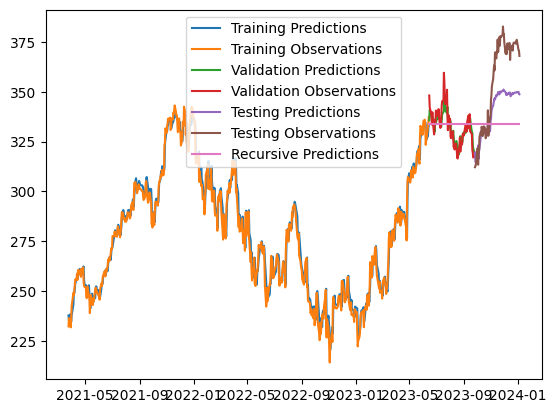

In [25]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])